# AIVLE 1차 미니프로젝트
## 서울시 생활정보 기반 대중교통 수요 분석
### 2. 서울시 유동인구 데이터

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

In [3]:
DATA_PATH = 'data/'

In [4]:
seoul_moving = pd.read_csv(DATA_PATH + '1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [5]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
968458,202204,토,23,39000,11250,M,45,EH,50,3.16
968459,202204,토,23,39000,11250,M,50,EH,70,3.27
968460,202204,토,23,39000,11250,M,55,EE,50,3.31
968461,202204,토,23,39000,11250,M,55,EH,50,3.28


In [6]:
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [7]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [8]:
seoul_moving.tail()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
968458,202204,토,23,39000,11250,M,45,EH,50,3.16
968459,202204,토,23,39000,11250,M,50,EH,70,3.27
968460,202204,토,23,39000,11250,M,55,EE,50,3.31
968461,202204,토,23,39000,11250,M,55,EH,50,3.28
968462,202204,토,23,39000,11250,M,75,EH,30,5.94


In [9]:
seoul_moving.replace("*","2", inplace=True)
seoul_moving = seoul_moving.astype({'이동인구(합)':'float'})

seoul_moving['출발'] = seoul_moving['출발 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

seoul_moving['도착'] = seoul_moving['도착 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
 10  출발           object 
 11  도착           object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.8+ GB


In [10]:
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [11]:
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

In [12]:
seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

In [13]:
# 심야 최다 이동 요일
night = seoul_moving.loc[seoul_moving['도착시간'] <= 5]
night['요일'].value_counts()


토    501891
금    435296
일    383611
목    377407
수    371376
화    359741
월    338716
Name: 요일, dtype: int64

In [27]:
# 서울출발 ~ 서울도착
only_seoul = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]
only_seoul


,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발,도착
0,202204,일,0,11010,11010,F,0,EE,10,28.02,종로구,종로구
1,202204,일,0,11010,11010,F,0,EH,10,27.52,종로구,종로구
2,202204,일,0,11010,11010,F,0,HE,10,27.83,종로구,종로구
3,202204,일,0,11010,11010,F,10,HW,10,6.05,종로구,종로구
4,202204,일,0,11010,11010,F,10,EH,90,5.95,종로구,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10,강동구,강동구
920411,202204,토,23,11250,11250,M,80,EH,10,28.36,강동구,강동구
920412,202204,토,23,11250,11250,M,80,EE,20,37.99,강동구,강동구
920413,202204,토,23,11250,11250,M,80,HE,10,9.42,강동구,강동구


In [30]:
# tmp_st = only_seoul.groupby(by=['출발'], as_index=False)['이동인구(합)'].sum()
# tmp_ed = only_seoul.groupby(by=['도착'], as_index=False)['이동인구(합)'].sum()

o_move_sum1 = only_seoul.groupby(by=['출발', '도착'], as_index=False)['이동인구(합)'].sum()
o_move_sum1.rename(columns={'이동인구(합)' : '총 이동인구'}, inplace=True)


In [31]:
o_move_sum1

,출발,도착,총 이동인구
0,강남구,강남구,24645635.26
1,강남구,강동구,887641.96
2,강남구,강북구,255581.36
3,강남구,강서구,468843.27
4,강남구,관악구,1153663.97
...,...,...,...
620,중랑구,용산구,109326.21
621,중랑구,은평구,45210.57
622,중랑구,종로구,258428.59
623,중랑구,중구,270464.77


In [33]:
out_max_county = o_move_sum1.loc[o_move_sum1['총 이동인구'] == o_move_sum1['총 이동인구'].max()]
out_min_county = o_move_sum1.loc[o_move_sum1['총 이동인구'] == o_move_sum1['총 이동인구'].min()]

print(f'유출 max : {out_max_county}')
print()
print(f'유출 min : {out_min_county}')
print()


유출 max :     출발   도착       총 이동인구
0  강남구  강남구  24645635.26

유출 min :       출발   도착   총 이동인구
243  도봉구  양천구  17229.9



In [34]:
o_move_sum2 = only_seoul.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].sum()
o_move_sum2.rename(columns={'평균 이동 시간(분)' : '총 이동 시간'}, inplace=True)
o_move_sum2


,출발,도착,총 이동 시간
0,강남구,강남구,603670
1,강남구,강동구,616490
2,강남구,강북구,489030
3,강남구,강서구,581830
4,강남구,관악구,608100
...,...,...,...
620,중랑구,용산구,286250
621,중랑구,은평구,228080
622,중랑구,종로구,350540
623,중랑구,중구,380020


In [35]:
o_move_mean1 = only_seoul.groupby(by=['출발', '도착'], as_index=False)['이동인구(합)'].mean()
o_move_mean2 = only_seoul.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].mean()
o_move_count = only_seoul.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].count()
o_move_count.rename(columns={'평균 이동 시간(분)' : '빈도'}, inplace=True)

In [36]:
o_move_mean1

,출발,도착,이동인구(합)
0,강남구,강남구,525.728690
1,강남구,강동구,35.747330
2,강남구,강북구,16.423426
3,강남구,강서구,24.571211
4,강남구,관악구,46.157637
...,...,...,...
620,중랑구,용산구,10.997506
621,중랑구,은평구,6.384772
622,중랑구,종로구,18.717215
623,중랑구,중구,18.523715


In [37]:
o_move_mean2

,출발,도착,평균 이동 시간(분)
0,강남구,강남구,12.877194
1,강남구,강동구,24.827433
2,강남구,강북구,31.424624
3,강남구,강서구,30.492637
4,강남구,관악구,24.329839
...,...,...,...
620,중랑구,용산구,28.794890
621,중랑구,은평구,32.210140
622,중랑구,종로구,25.388571
623,중랑구,중구,26.026984


In [38]:
o_move_count

,출발,도착,빈도
0,강남구,강남구,46879
1,강남구,강동구,24831
2,강남구,강북구,15562
3,강남구,강서구,19081
4,강남구,관악구,24994
...,...,...,...
620,중랑구,용산구,9941
621,중랑구,은평구,7081
622,중랑구,종로구,13807
623,중랑구,중구,14601


In [39]:
o_move_sum = pd.merge(o_move_sum1, o_move_sum2, on=['출발', '도착'])
o_move_mean = pd.merge(o_move_mean1, o_move_mean2, on=['출발', '도착'])
tmp = pd.merge(o_move_sum, o_move_mean, on=['출발', '도착'])
o_move_m = pd.merge(tmp, o_move_count, on=['출발', '도착'])
o_move_m

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도
0,강남구,강남구,24645635.26,603670,525.728690,12.877194,46879
1,강남구,강동구,887641.96,616490,35.747330,24.827433,24831
2,강남구,강북구,255581.36,489030,16.423426,31.424624,15562
3,강남구,강서구,468843.27,581830,24.571211,30.492637,19081
4,강남구,관악구,1153663.97,608100,46.157637,24.329839,24994
...,...,...,...,...,...,...,...
620,중랑구,용산구,109326.21,286250,10.997506,28.794890,9941
621,중랑구,은평구,45210.57,228080,6.384772,32.210140,7081
622,중랑구,종로구,258428.59,350540,18.717215,25.388571,13807
623,중랑구,중구,270464.77,380020,18.523715,26.026984,14601


In [40]:
o_move_m.sort_values(by='빈도', ascending=False)
o_move_m['총이동인구/빈도'] = o_move_m['총 이동인구'] / o_move_m['빈도']
o_move_m['총이동시간/빈도'] = o_move_m['총 이동 시간'] / o_move_m['빈도']


In [41]:
o_move_m.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False)
tmp = o_move_m.loc[o_move_m['출발'] != o_move_m['도착']]
tmp.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
350,서초구,강남구,4802309.66,594630,124.473437,15.412509,38581,124.473437,15.412509
14,강남구,서초구,4814578.33,608310,124.404494,15.718198,38701,124.404494,15.718198
425,송파구,강남구,3314641.58,654700,93.673635,18.502190,35385,93.673635,18.502190
17,강남구,송파구,3326366.66,676720,93.269590,18.974877,35664,93.269590,18.974877
42,강동구,송파구,2640613.78,658870,73.830280,18.421685,35766,73.830280,18.421685
...,...,...,...,...,...,...,...,...,...
452,양천구,강북구,24053.72,147010,5.714830,34.927536,4209,5.714830,34.927536
459,양천구,도봉구,17740.78,123960,5.335573,37.281203,3325,5.335573,37.281203
618,중랑구,양천구,24349.95,164770,5.293467,35.819565,4600,5.293467,35.819565
243,도봉구,양천구,17229.90,119720,5.280386,36.690162,3263,5.280386,36.690162


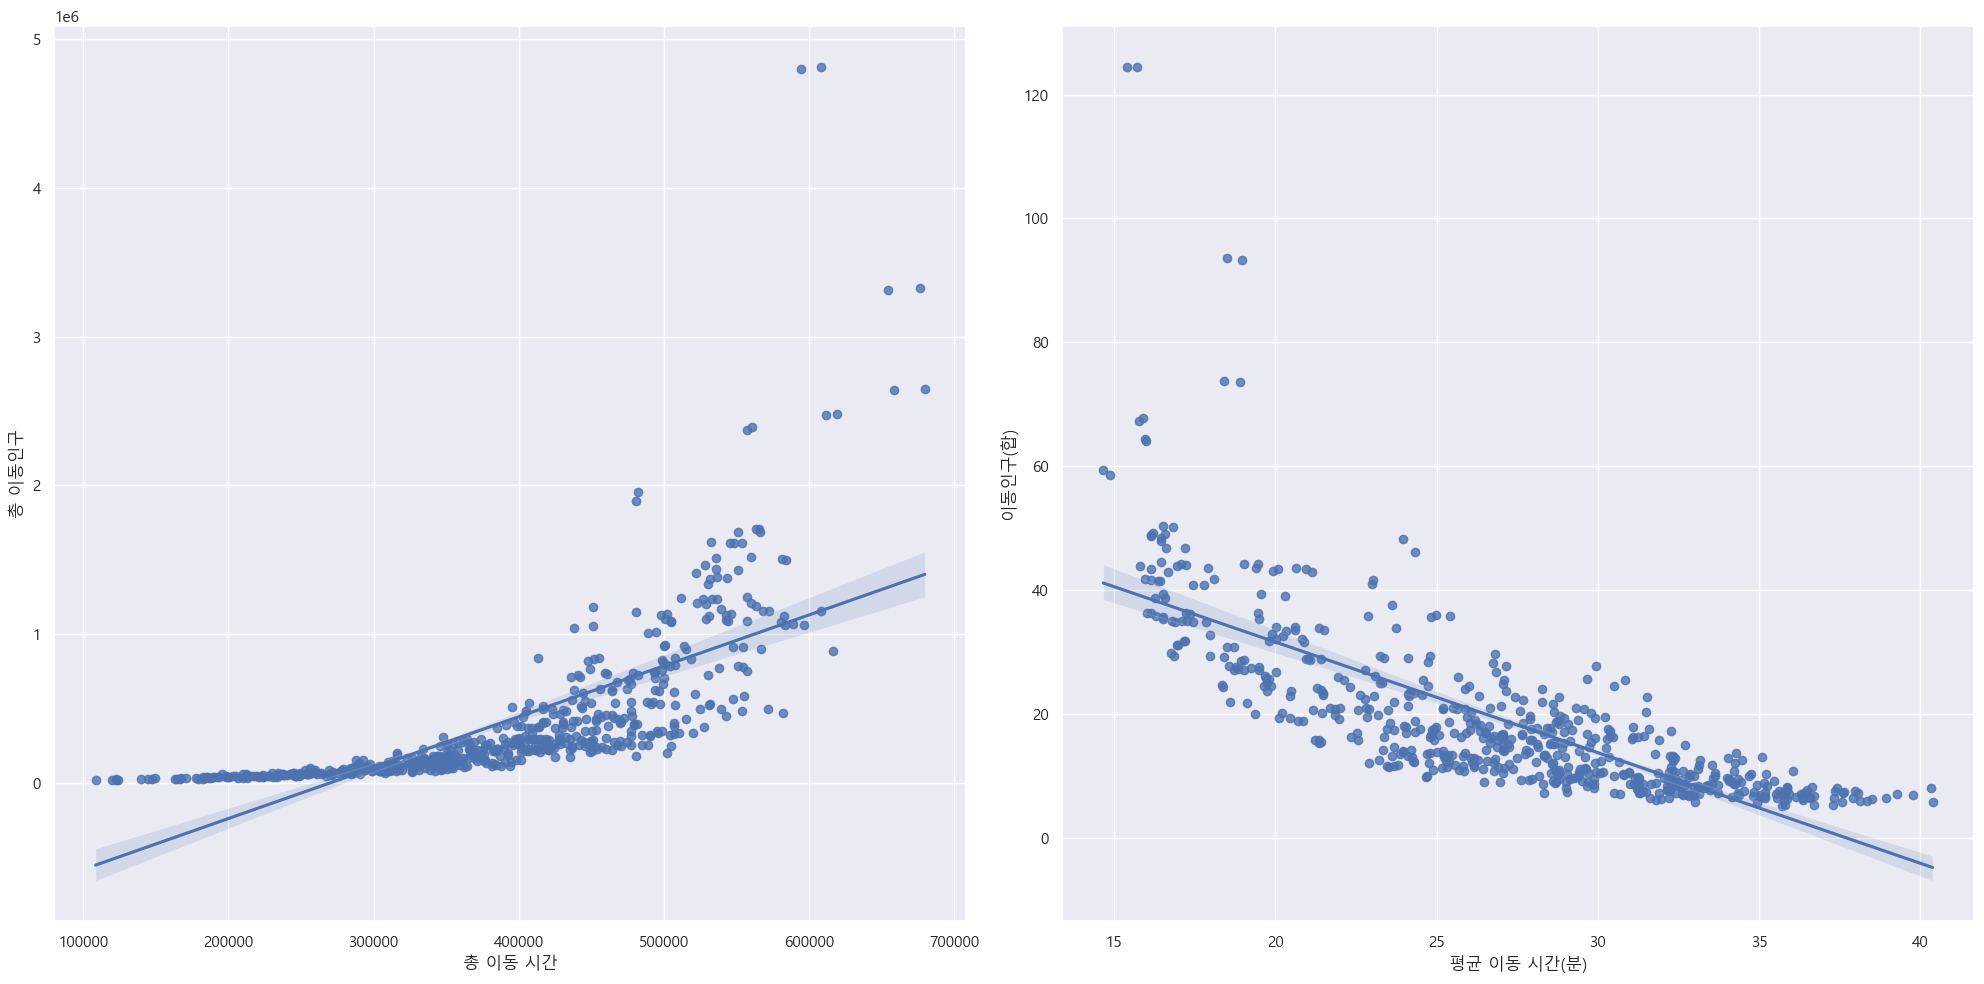

In [42]:
# 도착지 기준 이동시간 - 이동인구
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.regplot(data=tmp, x='총 이동 시간', y = '총 이동인구')
plt.subplot(1,2,2)
sns.regplot(data=tmp, x='평균 이동 시간(분)', y = '이동인구(합)')
plt.tight_layout()
plt.show()

In [43]:
# 총 이동시간과 총 인구이동의 상관관계가 있음
result = spst.pearsonr(tmp['총 이동 시간'], tmp['총 이동인구'])
print(f'합계 : {result}')
# 평균 이동 시간과 이동인구의 상관관계가 있음
result = spst.pearsonr(tmp['평균 이동 시간(분)'], tmp['이동인구(합)'])
print(f'평균 : {result}')

합계 : PearsonRResult(statistic=0.7094879318170608, pvalue=5.953696225505474e-93)
평균 : PearsonRResult(statistic=-0.7486088916972382, pvalue=8.096977520142056e-109)


In [44]:
tmp.to_csv(DATA_PATH + 'df_seoul_moving_default.csv', index=False)